Import required libraries and define the objective function parameters. The objective function is a simple continuous optimization problem that tries to find a value close to a=10.

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Problem parameters
a = 10  # Target value
n = 30  # Number of iterations in objective function

def objective_function(x):
    y = 0
    for i in range(30):
        y = y + math.pow(x[0] - a, 2)
    return y

Define PSO algorithm parameters including search bounds, particle size, and algorithm constants that control particle behavior.

In [2]:
# PSO parameters
bounds = [(-100, 100)]  # Search space bounds
nv = len(bounds)        # Number of variables
mm = -1                 # -1 for minimization, 1 for maximization

# PSO settings
particle_size = 100     # Number of particles
iterations = 20         # Max iterations
w = 0.85               # Inertia constant
c1 = 1                 # Cognitive constant
c2 = 2                 # Social constant

# Lists to store results for different swarm sizes
psize10 = []
psize100 = []
psize1000 = []

Define the Particle class that represents each individual in the swarm. Each particle has a position, velocity, and memory of its best position.

In [3]:
class Particle:
    def __init__(self, bounds):
        self.particle_position = [50.0]  # Initial position
        self.particle_velocity = [random.uniform(-1, 1)]  # Initial velocity
        self.local_best_particle_position = []
        self.fitness_local_best_particle_position = initial_fitness
        self.fitness_particle_position = initial_fitness

    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:  # Minimization
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position.copy()
                self.fitness_local_best_particle_position = self.fitness_particle_position
        else:  # Maximization
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position.copy()
                self.fitness_local_best_particle_position = self.fitness_particle_position

    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()
            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]
            # Bound checking
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]

Define the PSO class that manages the entire swarm and optimization process. This class handles the initialization of particles and iterative optimization process.

In [4]:
class PSO:
    def __init__(self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []

        # Initialize swarm
        swarm_particle = [Particle(bounds) for _ in range(particle_size)]

        # Optimization loop
        for i in range(iterations):
            # Evaluate particles
            for particle in swarm_particle:
                particle.evaluate(objective_function)

                # Update global best
                if mm == -1:  # Minimization
                    if particle.fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = particle.particle_position.copy()
                        fitness_global_best_particle_position = particle.fitness_particle_position
                else:  # Maximization
                    if particle.fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = particle.particle_position.copy()
                        fitness_global_best_particle_position = particle.fitness_particle_position

            # Update particles
            for particle in swarm_particle:
                particle.update_velocity(global_best_particle_position)
                particle.update_position(bounds)

            # Record best fitness for plotting
            if particle_size == 10:
                psize10.append(fitness_global_best_particle_position)
            elif particle_size == 100:
                psize100.append(fitness_global_best_particle_position)
            elif particle_size == 1000:
                psize1000.append(fitness_global_best_particle_position)

        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)

Run the benchmark experiments with different swarm sizes and visualize the results using matplotlib.


Running with 10 particles:
Optimal solution: [10.007939139925893]
Objective function value: 0.0018908982828874659

Running with 100 particles:
Optimal solution: [10.016964558612576]
Objective function value: 0.008633887467586204

Running with 1000 particles:
Optimal solution: [10.00041573769146]
Objective function value: 5.185134843019542e-06


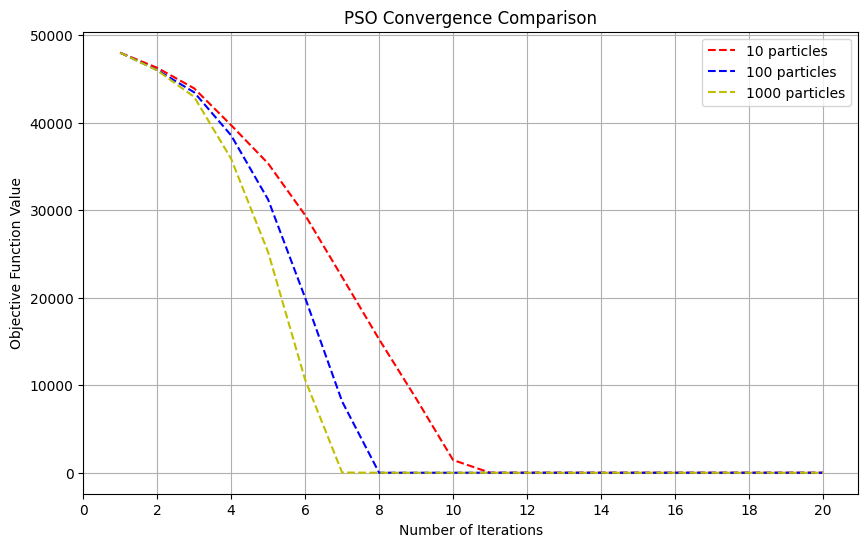

In [5]:
# Initialize fitness value based on optimization type
initial_fitness = float("inf") if mm == -1 else -float("inf")

# Run benchmark with different swarm sizes
print("\nRunning with 10 particles:")
PSO(objective_function, bounds, 10, iterations)
print("\nRunning with 100 particles:")
PSO(objective_function, bounds, 100, iterations)
print("\nRunning with 1000 particles:")
PSO(objective_function, bounds, 1000, iterations)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(psize10)+1), psize10, 'r--', label='10 particles')
plt.plot(np.arange(1, len(psize100)+1), psize100, 'b--', label='100 particles')
plt.plot(np.arange(1, len(psize1000)+1), psize1000, 'y--', label='1000 particles')
plt.title("PSO Convergence Comparison")
plt.ylabel('Objective Function Value')
plt.xlabel('Number of Iterations')
plt.xticks(np.arange(0, 21, step=2))
plt.legend()
plt.grid(True)
plt.show()